In [7]:
# used for classification problems with yes no kind of answers - this is binary classification
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('insurance_data.csv')
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


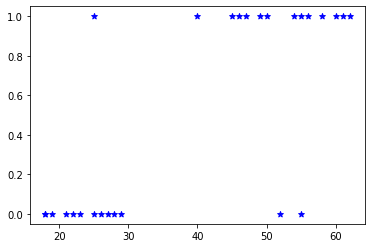

In [9]:
plt.scatter(df.age, df.bought_insurance, color='blue', marker='*')

In [16]:
x_train, x_test, y_train, y_test =train_test_split(df[['age']],df.bought_insurance, test_size=0.1)

In [17]:
x_train

,age
14,49
6,55
1,25
24,50
12,27
8,62
5,56
0,22
22,40
20,21


In [18]:
model = LogisticRegression()

In [19]:
model.fit(x_train, y_train)# training for model when we use fit and predict for testing

LogisticRegression()

In [20]:
model.predict(x_test)

array([0, 1, 1])

In [21]:
x_test

,age
21,26
23,45
2,47


In [22]:
model.score(x_test,y_test)

1.0

In [23]:
y_test

21    0
23    1
2     1
Name: bought_insurance, dtype: int64

In [24]:
model.predict_proba(x_test) # predicts probability of test data falling under either 1 or 0 class

array([[0.85168762, 0.14831238],
       [0.34737414, 0.65262586],
       [0.29297679, 0.70702321]])

# Multiclass Classification

In [25]:
from sklearn.datasets import load_digits

In [28]:
digits = load_digits()

In [29]:
dir(digits)


['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [30]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [33]:
x_train, x_test, y_train, y_test =train_test_split(digits.data,digits.target, test_size=0.1)

In [39]:
len(x_train)
len(x_test)

180

In [48]:
model1 = LogisticRegression()

In [49]:
model1.fit(x_train, y_train)

/Users/manveerkaur/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [50]:
model1.predict(x_test)

array([0, 5, 3, 6, 9, 8, 4, 4, 8, 7, 9, 3, 4, 3, 8, 2, 4, 0, 7, 2, 4, 7,
       3, 0, 7, 3, 6, 3, 2, 5, 8, 6, 0, 5, 9, 3, 2, 2, 1, 9, 5, 2, 2, 9,
       9, 9, 1, 7, 6, 3, 1, 0, 4, 4, 8, 6, 1, 6, 0, 4, 4, 3, 1, 7, 6, 7,
       3, 4, 8, 5, 5, 5, 6, 4, 7, 5, 4, 1, 5, 6, 5, 4, 4, 6, 5, 2, 1, 2,
       6, 5, 8, 3, 4, 9, 8, 9, 8, 8, 9, 1, 4, 4, 2, 9, 2, 5, 2, 1, 6, 2,
       3, 8, 9, 3, 7, 5, 5, 5, 7, 7, 1, 8, 7, 0, 2, 1, 3, 3, 0, 9, 3, 1,
       4, 1, 6, 4, 1, 0, 3, 7, 2, 7, 5, 3, 8, 4, 6, 0, 4, 0, 1, 1, 5, 4,
       2, 3, 0, 0, 3, 8, 8, 5, 7, 5, 7, 5, 5, 1, 1, 2, 4, 1, 3, 1, 2, 9,
       9, 5, 3, 2])

In [51]:
model1.score(x_test,y_test)

0.9611111111111111

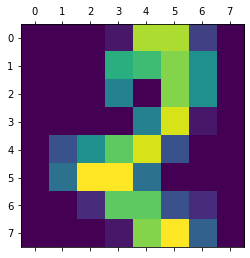

In [52]:
plt.matshow(digits.images[54])

In [53]:
digits.target[54]

2

In [54]:
model1.predict([digits.data[54]])

array([2])

# Find Where it failed using confusion matrix

In [55]:
y_predicted = model1.predict(x_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[13,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 18,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  0, 18,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 22,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 21,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 22,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 14,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 16,  0,  1],
       [ 0,  1,  0,  0,  0,  1,  0,  0, 15,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  0, 14]])

Text(69.0, 0.5, 'Truth')

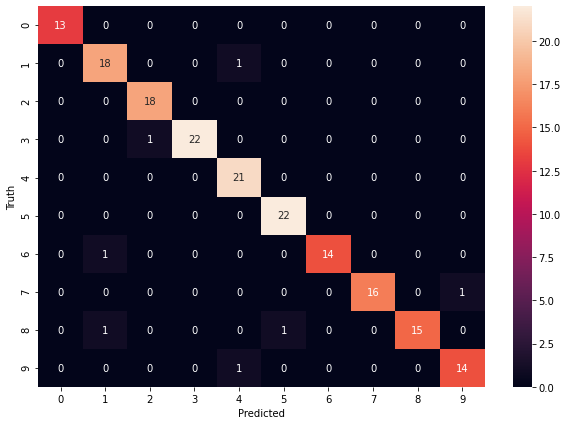

In [56]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot= True)
plt.xlabel('Predicted')
plt.ylabel('Truth')